Name: Vanshika Jain<br>
Roll No: BT18CSE107

# Welcome to Assignment 1 on course CV_CSL442_S21

## <span style='color:red'> ***Instructions:***</span>
#### <span style='color:red'>1. Use Python 3.x, jupyter notebook to run this notebook.</span>
#### <span style='color:red'>2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE' you sould not change anything else code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.</span>
#### <span style='color:red'>3. Read documentation of each function carefully.</span>
#### <span style='color:red'>4. Out of 7 questions we consider best 5 for the evaluation purpose.</span>
#### <span style='color:red'>5. Copying assignment solutions from others is strongly discouraged and will be considered as violation of academic code of conduct.</span>
#### <span style='color:red'>6. Early submitted assignment solutions will be considered for evaluation, so students please check your solutions carefully before submission.</span>
#### <span style='color:red'>7. Required two items for submission:</span>
    1. Solutions jupyter notebook file.
    2. Link to the recorded video of your program explanation and output demo. Try to keep the video duration minimum (preferably 10-15min).
#### <span style='color:red'>8. All the submissions should be submitted only in teams. Assignmnet due date is 15.2.2021 before 5:00PM. Late submission is accepted till 16.2.2021 before 5:00PM with 2 marks penalty from the accquired marks.</span>
#### <span style='color:blue'>***-:All the best:-***</span>

<span style='color:red'>1Q. Using basic image operations combine the scene and object images to get the composite image as shown below.</span>

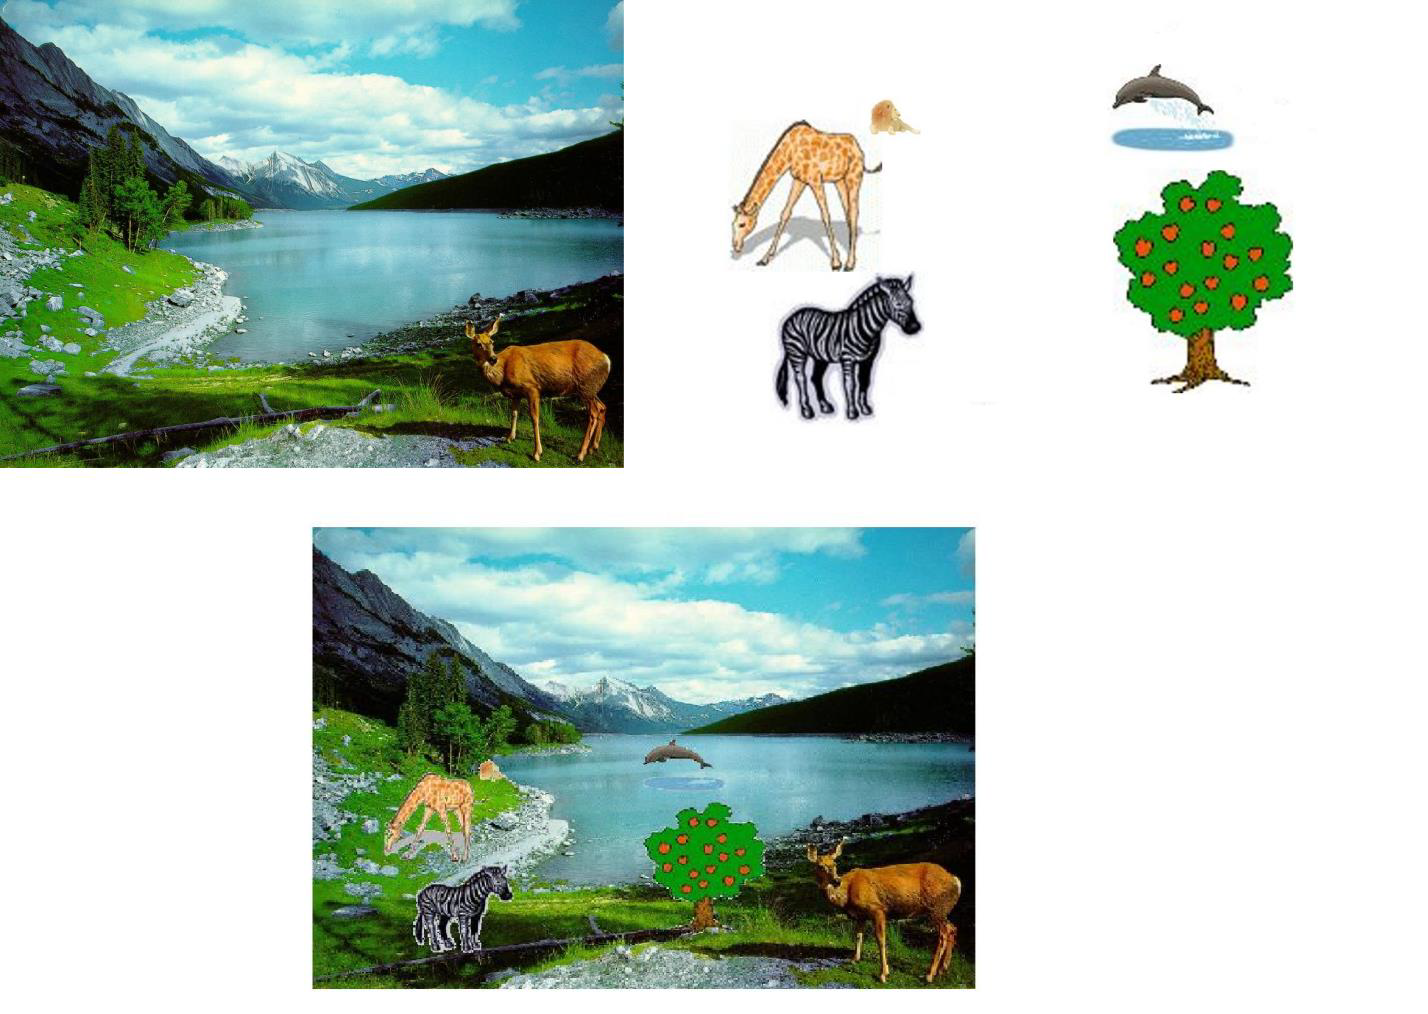

([], <a list of 0 Text yticklabel objects>)

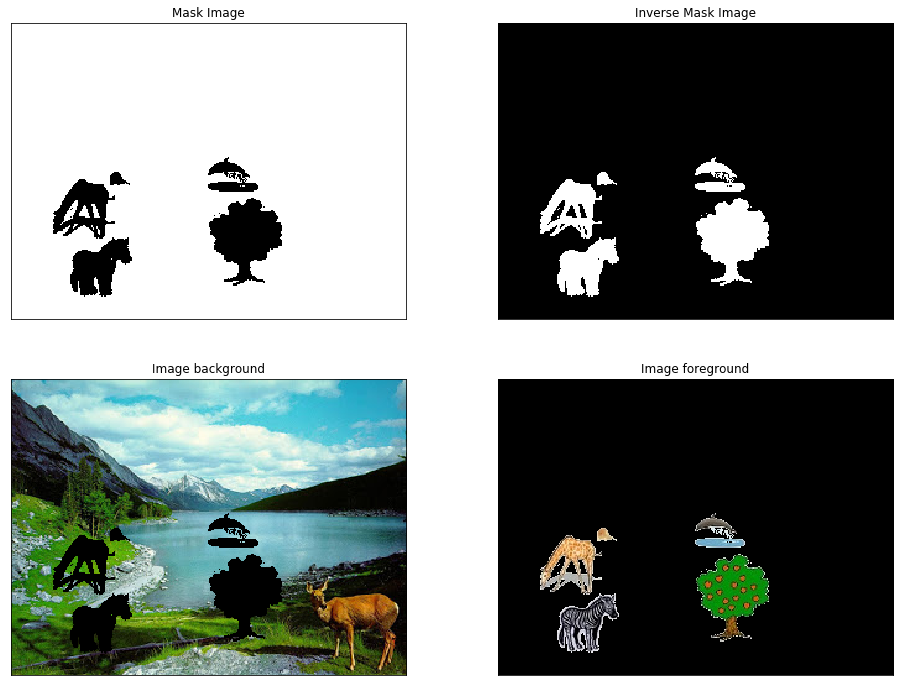

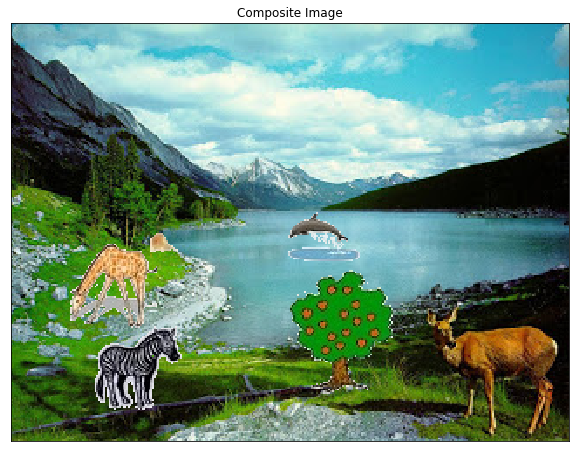

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


img1 = cv2.imread("./Images/img61.jpg")
img2 = cv2.imread("./Images/Sample_Image.jpg")

#YOUR CODE STARTS HERE

# creating mask of secomd image by conveting the intensities into binary values 
mask=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(mask,240,1,cv2.THRESH_BINARY)[1]

# inverse mask
mask_inv = abs(1-mask[::1])

# brute force way of multiplying all the channels to the mask independently 
img_foreground=np.zeros((240,320,3))
img_foreground[:,:,0] = mask_inv*img2[:,:,0]
img_foreground[:,:,1] = mask_inv*img2[:,:,1]
img_foreground[:,:,2] = mask_inv*img2[:,:,2]

# repeating the same mask on all the 3 channels
mask=np.repeat(mask[:, :, np.newaxis], 3, axis=2)
img_background=img1*mask

# getting the final composite image
res_img = img_background + img_foreground

mask=(mask*255).astype(np.uint8)
mask_inv=(mask_inv*255).astype(np.uint8)

img_foreground=(img_foreground).astype(np.uint8)
res_img=(res_img).astype(np.uint8)


#YOUR CODE ENDS HERE

mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
mask_inv=cv2.cvtColor(mask_inv,cv2.COLOR_BGR2RGB)
img_background=cv2.cvtColor(img_background,cv2.COLOR_BGR2RGB)
img_foreground=cv2.cvtColor(img_foreground,cv2.COLOR_BGR2RGB)
res_img=cv2.cvtColor(res_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(mask)
plt.title('Mask Image')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(mask_inv)
plt.title('Inverse Mask Image')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(img_background)
plt.title('Image background')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(img_foreground)
plt.title('Image foreground')
plt.xticks([])
plt.yticks([])
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
plt.imshow(res_img)
plt.title('Composite Image')
plt.xticks([])
plt.yticks([])

<span style='color:red'>2Q. Implement a function domIntensity(im, k), which takes an image im and an integer k and returns a list of k most dominant intensities of that image. Experiment your code on any 3 images to validate the program output.</span>

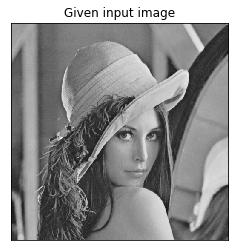

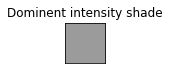

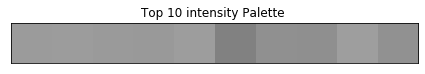

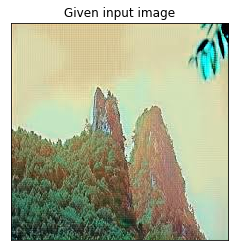

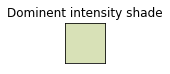

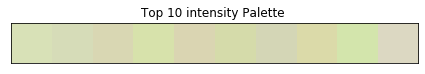

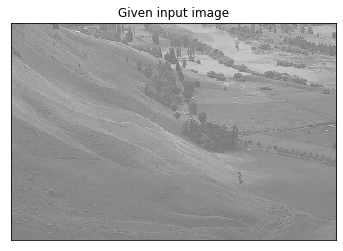

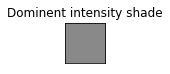

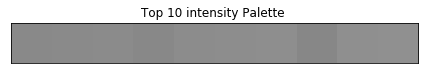

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def domIntensity(im, k):
    #YOUR CODE STARTS HERE
   
    # For gray scale images 
    if len(im.shape) == 2:
        histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
        sorted_intensities=np.argsort(histogram,axis=None)
        sorted_intensities=np.repeat(sorted_intensities[...,None],3,axis=1)
        sorted_intensities=sorted_intensities[::-1]
        
    # For coloured images 
    else:
        hist1 = cv2.calcHist([im], [0], None, [256], [0, 256])
        hist2 = cv2.calcHist([im], [1], None, [256], [0, 256])
        hist3 = cv2.calcHist([im], [2], None, [256], [0, 256])
        histogram=np.concatenate((hist1,hist2,hist3),axis=1)
        sorted_intensities=np.argsort(histogram,axis=0)
        sorted_intensities=sorted_intensities[::-1]
        
    #YOUR CODE ENDS HERE
    return sorted_intensities[:k]

def displayIntensityPalette(im, dom_list):
    plt.figure()
    if len(im.shape) == 2:
        plt.imshow(im, cmap = "gray")
    else:
        plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    plt.title("Given input image")
    k = len(dom_list)
    # Most dominant intensity
    top_im = np.array([[list(dom_list[0])]])
    plt.figure(figsize = (0.75,0.75), frameon=False)
    plt.imshow(top_im)
    plt.title('Dominent intensity shade')
    plt.xticks([])
    plt.yticks([])
    # k most dominant intensity palette
    plt.figure(figsize = ((0.75*k),0.75), frameon=False)
    dom_inty_im = np.array([[list(dom_list[i]) for i in range(k)]])
    plt.imshow(dom_inty_im)
    plt.xticks([])
    plt.yticks([])
    plt.title("Top 10 intensity Palette ")

im = cv2.imread("./Images/lena_gray_256.tif")
dom_list = domIntensity(im,10)
displayIntensityPalette(im, dom_list)

im1 = cv2.imread("./Images/hills.jpeg")
dom_list1 = domIntensity(im1,10)
displayIntensityPalette(im1, dom_list1)

im2 = cv2.imread("./Images/histogram2.jpg")
dom_list2 = domIntensity(im2,10)
displayIntensityPalette(im2, dom_list2)

<span style='color:red'>3Q. Write a function <span style='color:blue'>histogramEqualization(image)</span> to stretch the image contrast. Using this function enhance the images histogram1.jpg, histogram2.jpg and histogram3.jpg and compare it with inbuilt function results. Record the observations.</span> 

<Figure size 1152x864 with 0 Axes>

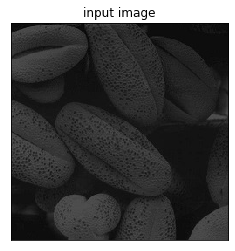

<Figure size 1152x864 with 0 Axes>

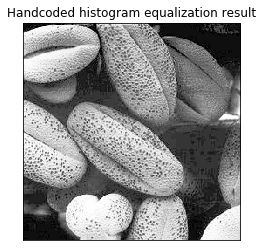

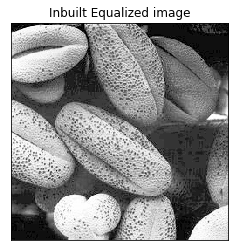

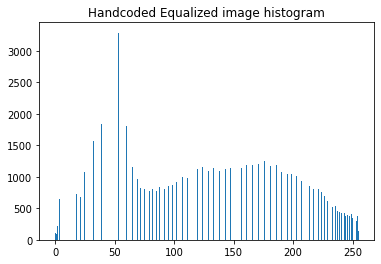

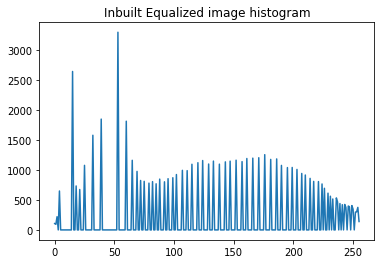

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

def plotHistogram(im):
    #YOUR CODE STARTS HERE
    
    #calculating the frequency of each intensity in the image
    imgHist=[0]*256
    for i in im:
        for j in i:
            imgHist[j]=imgHist[j]+1

    #YOUR CODE ENDS HERE
    return imgHist

def histogramEqualization(im):
    #YOUR CODE STARTS HERE
    (m,n)=im.shape
    size=m*n
    L=256
    imgHist=plotHistogram(im)
    cdf=[0]*L
    tot=0
    
    #  calculating cdf and probabilty
    for i in range(256):
        tot+=imgHist[i]
        cdf[i]=np.round((L-1)*tot/size)
    
    im_new=im.copy()
    
    # assigning the new values     
    for i in range(m):
        for j in range(n):
            im_new[i][j]=cdf[im[i][j]]


    #YOUR CODE ENDS HERE
    return im_new

he = cv2.imread('./Images/histogram3.jpg',0)
he1=cv2.cvtColor(he,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.figure()
plt.title("input image")
plt.imshow(he1)
plt.xticks([])
plt.yticks([])

# Implemented
eq_img= histogramEqualization(he)
hist=plotHistogram(eq_img)
eq_img=cv2.cvtColor(eq_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,12))
plt.figure()
plt.title("Handcoded histogram equalization result")
plt.imshow(eq_img)
plt.xticks([])
plt.yticks([])

#inbuilt
inbuilt_hist_img=cv2.equalizeHist(he)
inbuilt_hist = cv2.calcHist([eq_img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Inbuilt Equalized image")
plt.imshow(inbuilt_hist_img, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.figure()
plt.title("Handcoded Equalized image histogram")
plt.bar(range(256),hist)
plt.show()
plt.figure()
plt.title("Inbuilt Equalized image histogram")
plt.plot(inbuilt_hist)
plt.show()

<span style='color:red'>4Q.Images of outdoor scenes are often degraded by haze (due to fog, dust, etc). Light is attenuated by its passage through the atmosphere, and additional unwanted scattered light is added. We want to enhance the images to remove the effect of the haze. Look at input histograms of images “haze1.tif” and “haze2.tif”. Let’s assume that the pixels in the degraded image that have the lowest values (in each color band) actually should be pure black, and the pixels that have the highest values (in each color band) are actually should be pure white. A simple de-hazing algorithm is to take a color image, and for each band (red, green, blue), stretch its values to occupy the full range (0 to 255), such that 1% of data at the extreme ends is saturated at the low and high values (see Matlab’s “imadjust”). Then put the bands back together into an RGB image. Implement this algorithm and test it on the given images.</span>

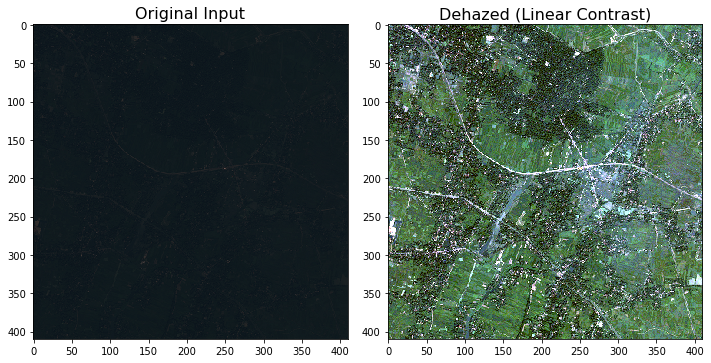

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# YOUR CODE STARTS HERE
def imadjust(img):
    eq_img = img.copy()
    
    hist = cv2.calcHist([img], None, None, [256], [0, 256])
    
    m,n = img.shape
    
    cdf = np.cumsum(hist)/(m*n)
    intensities = [0.0]
    
#     checking for the 1% intensities and removing them
    for i in range (256):
        if cdf[i] > 0.01:
            if cdf[i] < 0.99:
                intensities.append(i)
    
    minVal = intensities[1]
    maxVal = intensities[-1]

    newVal = np.arange(256)
    
#   Linearly expanding the intensities to cover the complete 0-255 range
    newVal = np.clip((newVal-minVal)*((255)/(maxVal-minVal)), 0, 255).astype(np.uint8)
    eq_img = newVal[eq_img]
    
    return eq_img

img=cv2.imread('./images/haze2.tif')
out_img=img

# separating the BGR channels and applying linear contrast independently

if len(img.shape)==3:
    b,g,r=cv2.split(img)
    b=imadjust(b)
    g=imadjust(g)
    r=imadjust(r)
    out_img=cv2.merge([b ,g,r])

else:
    out_img

plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
plt.title("Original Input", fontsize=16)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title("Dehazed (Linear Contrast)", fontsize=16)
plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()
    
# YOUR CODE ENDS HERE

<span style='color:red'>5Q. Try to enhance the ‘skeleton.jpg’ image by performing the sequence of operations given as comments in the program. make note of the observations in each step. </span>
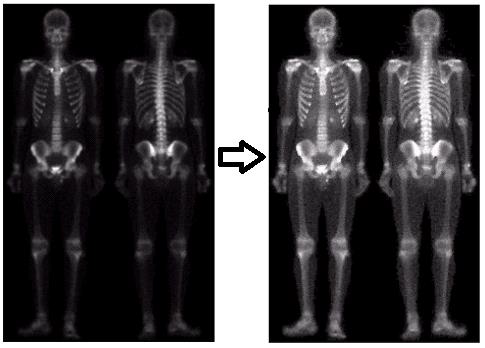

/Users/vanshikajain/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt


([], <a list of 0 Text yticklabel objects>)

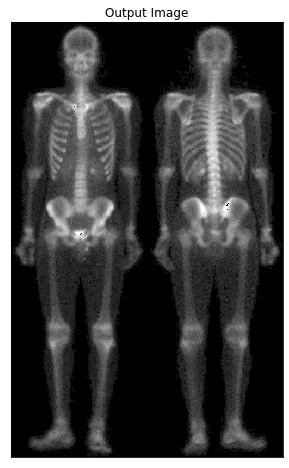

In [43]:
 # Question 5: Sequence of steps to enhance the image.

#1. (a).read image of whole body bone scan.
#2. (b) Laplacian of (a).
#3. (c) Sharpened image obtained by adding (a) and (b).
#4. (d) Sobel gradient of image (a).
#5. (e) Sobel image smoothed with a 5 × 5 box filter.
#6. (f) Mask image formed by the product of (b) and (e).
#7. (g) Sharpened image obtained by the adding images (a) and (f).
#8. (h) Final result obtained by applying a power-law transformation to (g).

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#YOUR CODE STARTS HERE

a = cv2.cvtColor(cv2.imread("./images/skeleton.tif"), cv2.COLOR_BGR2GRAY)
a=a/255

b=cv2.Laplacian(a ,cv2.CV_64F,ksize=3)

c=cv2.add(a,b)

e = cv2.Sobel(a,cv2.CV_64F,1,1,ksize=3)

f=b*e
g=cv2.add(f,a)

h=np.array(255*(g ** 0.5), dtype = 'uint8')

plt.figure(figsize=(10,8))
plt.title("Output Image")
plt.imshow(h, cmap = "gray")
plt.xticks([])
plt.yticks([])

#YOUR CODE ENDS HERE

<span style='color:red'>6Q. Write a program to find the largest correlation spot in the given image (hills.jpg) using linear filtering based template matching technique. Draw rectangular bounding box at the detected template (template.png) matched locations.</span>

[182, 1] (246, 44)


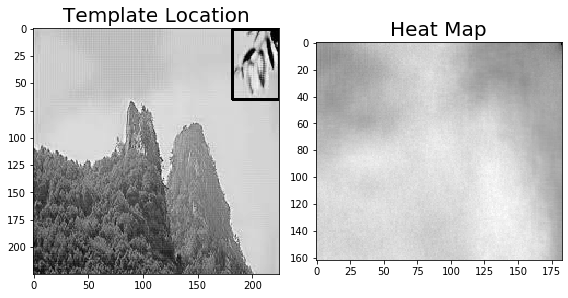

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Implement Linear Filtering technique on an image using a linear filter #correlation
def linear_filter(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHAGE THIS CODE    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]
    
    filter_ = cv2.cvtColor(filter_, cv2.COLOR_BGR2GRAY)
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]

    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    # YOUR CODE STARTS HERE

    # Using sum of squared difference to do template matching     

    pt=[0,0]
    mv=float('inf')
    for i in range(result_height):
        for j in range(result_width):
            val=0
            mat = np.subtract(filter_,image[i:i+filter_height,j:j+filter_width])
            mat=np.multiply(mat,mat)
            val =np.sum(mat)
            if(val<mv):
                mv=val
                pt=[j,i]
            result[i][j]=val

    print(pt,(pt[0] + filter_height, pt[1] + filter_width))
    cv2.rectangle(image, tuple(pt), (pt[0] + filter_width, pt[1] + filter_height), (0,0,0), 2)
    
    # YOUR CODE ENDS HERE
    return image, result



# To test your implementation, run the below code.
image = cv2.imread('./Images/hills.jpeg')
filter_ = cv2.imread('./Images/template1.jpeg')
outimg, result = linear_filter(image, filter_)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(outimg, cmap='gray')
plt.title('Template Location', fontsize=20)

plt.subplot(1,2,2)
plt.imshow(result, cmap='gray')
plt.title('Heat Map', fontsize=20)
plt.tight_layout()
plt.show()

<span style='color:red'>7Q. Write functions/subroutines to design spatial filters (sizes of 3X3 and 5X5) - mean, median, Min-Max. For the given noise images. Apply the appropriate filter to enhance the image quality. use images Cameraman_SandP_0.08.jpg, Camerman_G_0.05.jpg. Make observations upon comparing their outputs.</span> 

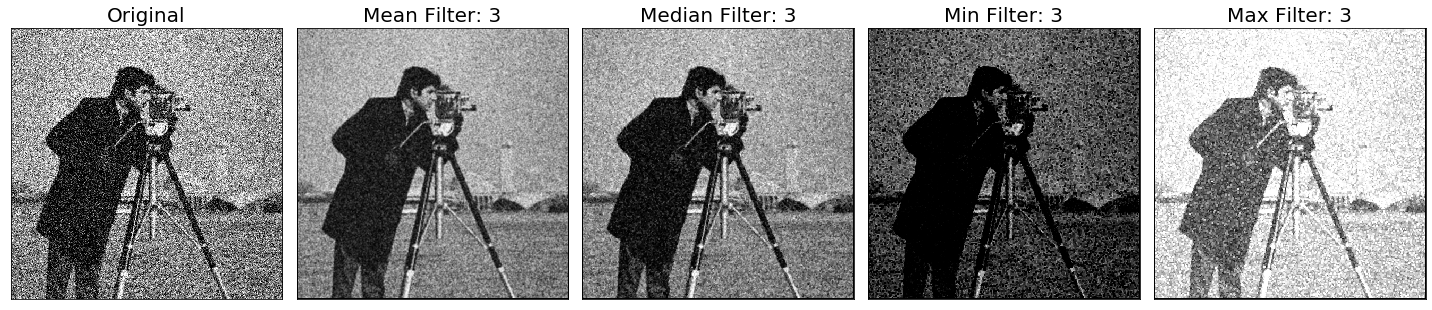

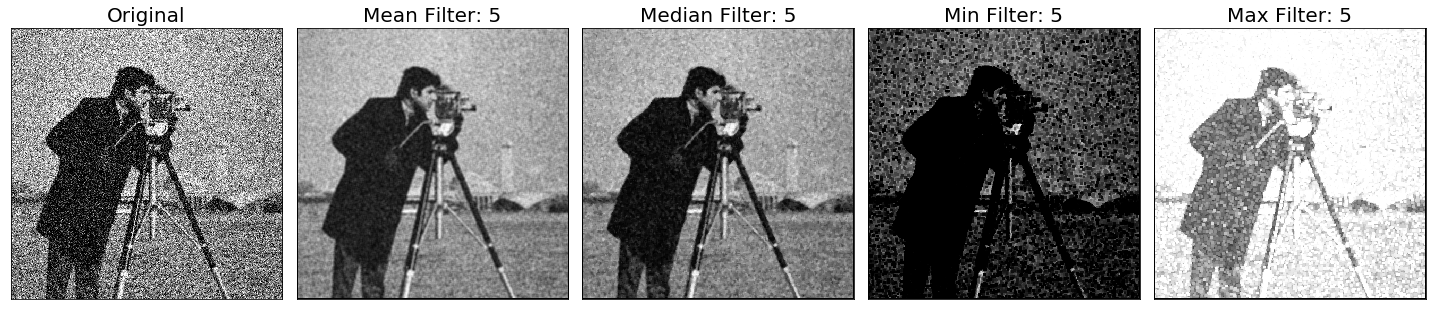

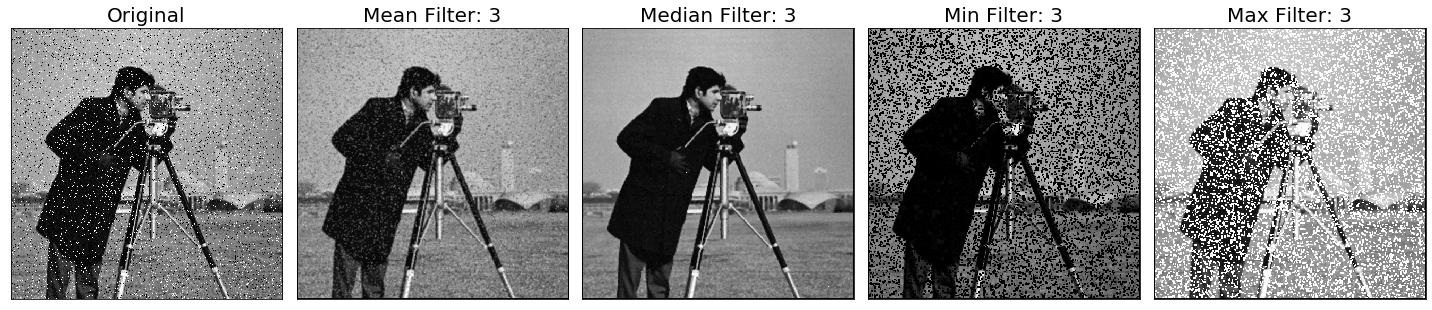

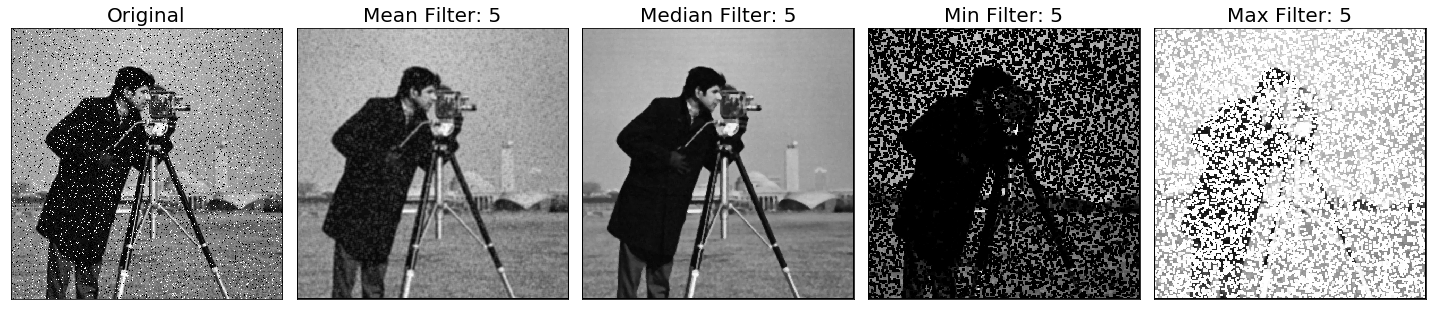

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#YOUR CODE STARTS HERE

img1 = cv2.cvtColor(cv2.imread('./images/Camerman_G_0.05.jpg'),cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(cv2.imread('./images/Cameraman_SandP_0.08.jpg'),cv2.COLOR_BGR2GRAY)


def mean_filter(img,sz):
    m,n = img.shape
    mask = np.ones([sz,sz], dtype = int)
    mask = mask/(sz*sz)
    img_new = np.zeros([m, n])
    k=sz//2
    for i in range(k, m-k): 
        for j in range(k, n-k): 
            temp= np.sum(np.multiply(img[i-k:i+k+1,j-k:j+k+1],mask))
            img_new[i, j]= temp 
            
    img_new = img_new.astype(np.uint8)
    return img_new

def median_filter(img,sz):
    m,n = img.shape
    img_new = np.zeros([m, n])
    k=sz//2
    for i in range(k, m-k): 
        for j in range(k, n-k): 
            temp= np.median(img[i-k:i+k+1,j-k:j+k+1].flatten())
            img_new[i,j]= temp 

    img_new = img_new.astype(np.uint8)
    return img_new

def min_filter(img,sz):
    m,n = img.shape
    img_new = np.zeros([m, n])
    k=sz//2
    for i in range(k, m-k): 
        for j in range(k, n-k): 
            temp= np.min(img[i-k:i+k+1,j-k:j+k+1].flatten())
            img_new[i,j]= temp 

    img_new = img_new.astype(np.uint8)
    return img_new

def max_filter(img,sz):
    m,n = img.shape
    img_new = np.zeros([m, n])
    k=sz//2
    for i in range(k, m-k): 
        for j in range(k, n-k): 
            temp= np.max(img[i-k:i+k+1,j-k:j+k+1].flatten())
            img_new[i,j]= temp 

    img_new = img_new.astype(np.uint8)
    return img_new


for img in [img1,img2]:
    for kernel_size in [3,5]:
        plt.figure(figsize=(20,20))
        
        plt.subplot(1, 5, 1)
        plt.title("Original", fontsize=20)
        plt.imshow(img, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(1, 5, 2)
        plt.title("Mean Filter: "+ str(kernel_size), fontsize=20)
        plt.imshow(mean_filter(img,kernel_size),cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(1, 5, 3)
        plt.title("Median Filter: "+ str(kernel_size), fontsize=20)
        plt.imshow(median_filter(img,kernel_size),cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(1, 5, 4)
        plt.title("Min Filter: "+ str(kernel_size), fontsize=20)
        plt.imshow(min_filter(img,kernel_size),cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(1, 5, 5)
        plt.title("Max Filter: " + str(kernel_size), fontsize=20)
        plt.imshow(max_filter(img,kernel_size),cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
        plt.tight_layout()
        plt.show()
        
#YOUR CODE ENDS HERE